# 实验五：DCT域数字水印技术

## 实验原理

### 数字水印概述
数字水印是一种在数字媒体（图像、音频、视频等）中嵌入隐蔽信息的技术，用于版权保护、内容认证和完整性验证。DCT域水印是一种在频域进行水印嵌入的方法，具有良好的鲁棒性和不可感知性。

### 核心思想
- 利用人眼视觉系统的感知特性
- 在视觉不敏感的频率分量中嵌入水印信息
- 在保持图像质量的前提下实现版权保护
- 通过频域变换提高水印的鲁棒性

### 数学原理

#### 第一步：离散余弦变换 (DCT)
对图像进行8×8分块，对每个块进行二维DCT变换：

**正向DCT变换：**
$$F(u,v) = \frac{2}{N}C(u)C(v)\sum_{x=0}^{N-1}\sum_{y=0}^{N-1}f(x,y)\cos\left[\frac{\pi u(2x+1)}{2N}\right]\cos\left[\frac{\pi v(2y+1)}{2N}\right]$$

**反向DCT变换：**
$$f(x,y) = \frac{2}{N}\sum_{u=0}^{N-1}\sum_{v=0}^{N-1}C(u)C(v)F(u,v)\cos\left[\frac{\pi u(2x+1)}{2N}\right]\cos\left[\frac{\pi v(2y+1)}{2N}\right]$$

其中：
- $N = 8$（块大小）
- $C(u) = C(v) = \frac{1}{\sqrt{2}}$ 当 $u=0$ 或 $v=0$，否则 $C(u) = C(v) = 1$
- $F(u,v)$ 为频域系数
- $f(x,y)$ 为空域像素值

#### DCT频率分布特性
DCT系数在频域的分布具有以下特性：
- **DC分量 (0,0)**：表示图像块的平均亮度
- **低频分量**：包含图像的主要信息，对视觉质量影响大
- **中频分量**：适合嵌入水印，在鲁棒性和不可感知性之间取得平衡
- **高频分量**：易受压缩和噪声影响，不适合水印嵌入

#### 第二步：水印嵌入策略
选择中频系数进行水印嵌入。为保证"符号 = 比特"的自洽性，采用符号强制控制方法：

**符号强制嵌入公式：**
$$F'(u,v) = \begin{cases}
|F(u,v)| + \alpha, & \text{if } w_i = 1 \\
-(|F(u,v)| + \alpha), & \text{if } w_i = 0
\end{cases}$$

其中：
- $F'(u,v)$：嵌入水印后的DCT系数
- $F(u,v)$：原始DCT系数
- $\alpha$：水印强度（嵌入强度参数）
- $w_i \in \{0, 1\}$：水印比特

**核心优势：**
- 直接控制系数符号，消除对原始分布的依赖
- 符号与水印比特完全对应：正数→1，负数→0
- 提高对原始系数幅值变化的鲁棒性

#### 第三步：水印提取
通过检查嵌入位置DCT系数的符号提取水印：

**提取公式：**
$$w'_i = \begin{cases}
1, & \text{if } F'(u,v) > 0 \\
0, & \text{if } F'(u,v) \leq 0
\end{cases}$$

**多频率联合提取（可选）：**

当在多个位置 $(u_1,v_1), (u_2,v_2), \ldots, (u_n,v_n)$ 上嵌入时，使用多数表决：

$$w'_i = \begin{cases}
1, & \text{if } \frac{1}{n}\sum_{k=1}^{n}\text{sign}(F'_k(u_k,v_k)) > 0 \\
0, & \text{otherwise}
\end{cases}$$

其中 $\text{sign}(x) = 1$ if $x > 0$ else $-1$

#### 第四步：质量评估指标

**峰值信噪比 (PSNR)：**
$$PSNR = 10 \log_{10}\left(\frac{MAX^2}{MSE}\right) \text{ dB}$$

$$MSE = \frac{1}{M \times N}\sum_{i=0}^{M-1}\sum_{j=0}^{N-1}[I(i,j) - I'(i,j)]^2$$

其中：
- $MAX = 255$（8位图像的最大像素值）
- $I(i,j)$：原始图像像素值
- $I'(i,j)$：水印图像像素值
- $M \times N$：图像尺寸

**PSNR质量标准：**
- PSNR > 40 dB：质量极好，视觉无差别
- PSNR > 30 dB：质量良好，无明显视觉差异
- PSNR > 20 dB：质量可接受，有轻微视觉差异
- PSNR < 20 dB：质量较差，有明显视觉差异

**比特错误率 (BER)：**
$$BER = \frac{\text{错误比特数}}{\text{总比特数}} \times 100\%$$

$$BER = \frac{\sum_{i=1}^{L} |w_i - w'_i|}{L} \times 100\%$$

其中：
- $w_i$：原始水印比特
- $w'_i$：提取的水印比特
- $L$：水印总长度

**BER性能标准：**
- BER = 0%：完美提取
- BER < 5%：优秀性能
- BER < 10%：良好性能
- BER > 10%：性能有待改善

### 鲁棒性攻击测试
为验证水印的鲁棒性，通常进行以下攻击测试：

1. **JPEG压缩**：模拟实际应用中的有损压缩
2. **高斯滤波**：模拟图像平滑处理
3. **加性高斯噪声**：模拟传输或存储噪声
4. **对比度调整**：模拟图像增强处理
5. **几何变换**：旋转、缩放、裁剪等

### 算法特点
1. **符号强制嵌入**：直接控制系数符号，确保"符号=比特"的自洽性
2. **盲检测**：不需要原始图像即可提取水印
3. **多频率支持**：可在多个中频系数上同时嵌入，通过多数表决提高鲁棒性
4. **灵活配置**：支持调整嵌入强度、嵌入位置、提取方式等

## 实验步骤
1. **图像加载** - 加载原始图像并预处理
2. **水印生成** - 生成随机二进制水印序列
3. **DCT变换** - 对图像进行分块DCT变换
4. **水印嵌入** - 在中频系数中嵌入水印信息（符号强制方式）
5. **IDCT变换** - 反变换得到含水印图像
6. **质量评估** - 计算PSNR和视觉效果分析
7. **水印提取** - 从含水印图像中提取水印
8. **鲁棒性测试** - 在各种攻击下测试水印性能

## 关键参数
- **block_size** = 8：DCT变换块大小
- **embed_pos** = [(4,4)] 或 [(3,4), (4,3), (4,4)]：水印嵌入位置（中频）
- **alpha** = 10：水印嵌入强度
- **image_size** = 512×512：测试图像尺寸
- **watermark_capacity** = (512/8)×(512/8) = 4096 bits：水印容量
- **embed_mode** = "sign_force"：嵌入模式（符号强制控制）

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import matplotlib
import time
import os

matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False

print("="*70)
print("DCT域数字水印技术的实现与评估")
print("="*70)

DCT域数字水印技术的实现与评估


In [40]:
def load_image(path=None, size=(512, 512)):
    """加载图像，如果文件不存在则生成合成图像
    
    参数：
        path: 图像文件路径
        size: 图像尺寸 (height, width)
    
    返回：
        img: float32格式的灰度图像，像素值范围[0, 255]
    """
    if path and os.path.exists(path):
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, size)
            print(f"已加载图像: {path}")
        else:
            print(f"无法读取图像文件: {path}，生成合成图像")
            img = None
    else:
        print("图像文件不存在或路径为空，生成合成图像...")
        img = None
    
    if img is None:
        # 生成具有纹理的合成图像
        np.random.seed(42)
        img = np.zeros(size, dtype=np.uint8)
        
        # 添加渐变背景
        for i in range(size[0]):
            for j in range(size[1]):
                img[i, j] = (i + j) % 256
        
        # 添加随机纹理
        noise = np.random.normal(0, 20, size)
        img = np.clip(img.astype(np.float32) + noise, 0, 255)
        
        print("已生成合成测试图像")
    
    return img.astype(np.float32)

def dct_2d(block):
    """2D DCT变换
    
    计算公式：
        F(u,v) = (2/N) * C(u) * C(v) * Σ Σ f(x,y) * cos((π*u*(2x+1))/(2N)) * cos((π*v*(2y+1))/(2N))
        其中 C(u) = 1/√2 当 u=0，否则 C(u) = 1
    """
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct_2d(block):
    """2D IDCT反变换
    
    逆向变换，将频域系数转换回空域像素值
    """
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

print("\n[步骤1] 图像加载与预处理...")
# 尝试加载测试图像，如果不存在则生成合成图像
original_image = load_image('./test_image.jpg', size=(512, 512))
print(f"图像尺寸: {original_image.shape}")
print(f"像素值范围: [{original_image.min():.1f}, {original_image.max():.1f}]")
print("DCT变换函数已定义")


[步骤1] 图像加载与预处理...
图像文件不存在或路径为空，生成合成图像...
已生成合成测试图像
图像尺寸: (512, 512)
像素值范围: [0.0, 255.0]
DCT变换函数已定义



[步骤2] DCT频域分析...

2.1 DCT频率分布特性：
   - DC分量(0,0): 图像块的平均亮度
   - 低频分量: 包含主要图像信息，对视觉质量影响大
   - 中频分量: 适合水印嵌入，鲁棒性与不可感知性平衡
   - 高频分量: 易受压缩和噪声影响，不适合嵌入

2.2 显示DCT频域特性


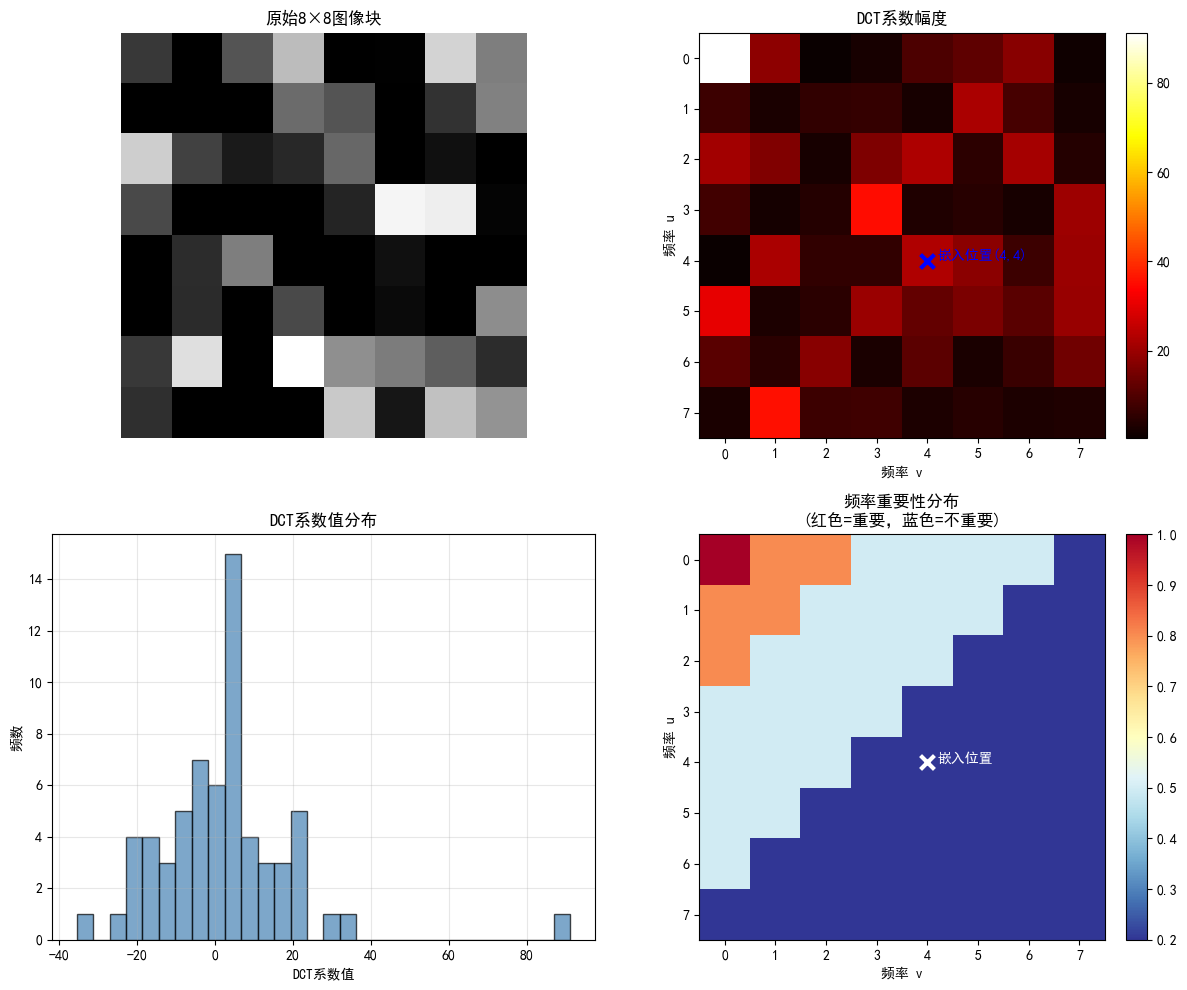


DCT系数统计:
   DC分量 (0,0): 91.23
   嵌入位置 (4,4): -23.01
   系数范围: [-35.49, 91.23]
   系数标准差: 17.63


In [41]:
print("\n[步骤2] DCT频域分析...")
print("\n2.1 DCT频率分布特性：")
print("   - DC分量(0,0): 图像块的平均亮度")
print("   - 低频分量: 包含主要图像信息，对视觉质量影响大")
print("   - 中频分量: 适合水印嵌入，鲁棒性与不可感知性平衡")
print("   - 高频分量: 易受压缩和噪声影响，不适合嵌入")

print(f"\n2.2 显示DCT频域特性")
# 取一个8x8块进行DCT分析
sample_block = original_image[0:8, 0:8]
dct_block = dct_2d(sample_block)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# 原始图像块
ax1.imshow(sample_block, cmap='gray')
ax1.set_title('原始8×8图像块', fontsize=12, fontweight='bold')
ax1.axis('off')

# DCT系数
im2 = ax2.imshow(np.abs(dct_block), cmap='hot')
ax2.set_title('DCT系数幅度', fontsize=12, fontweight='bold')
ax2.set_xlabel('频率 v')
ax2.set_ylabel('频率 u')
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

# 标记嵌入位置
ax2.scatter([4], [4], c='blue', s=100, marker='x', linewidths=3)
ax2.text(4.2, 4, '嵌入位置(4,4)', fontsize=10, fontweight='bold', color='blue')

# DCT系数分布直方图
ax3.hist(dct_block.flatten(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
ax3.set_xlabel('DCT系数值')
ax3.set_ylabel('频数')
ax3.set_title('DCT系数值分布', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 频率重要性图
importance_map = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        # DC分量最重要，其次是低频，中频适中，高频最低
        freq_dist = i + j
        if freq_dist == 0:
            importance_map[i, j] = 1.0  # DC分量
        elif freq_dist <= 2:
            importance_map[i, j] = 0.8  # 低频
        elif freq_dist <= 6:
            importance_map[i, j] = 0.5  # 中频（适合嵌入）
        else:
            importance_map[i, j] = 0.2  # 高频

im4 = ax4.imshow(importance_map, cmap='RdYlBu_r')
ax4.set_title('频率重要性分布\n(红色=重要，蓝色=不重要)', fontsize=12, fontweight='bold')
ax4.set_xlabel('频率 v')
ax4.set_ylabel('频率 u')
plt.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)

# 标记嵌入位置
ax4.scatter([4], [4], c='white', s=100, marker='x', linewidths=3)
ax4.text(4.2, 4, '嵌入位置', fontsize=10, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

print(f"\nDCT系数统计:")
print(f"   DC分量 (0,0): {dct_block[0, 0]:.2f}")
print(f"   嵌入位置 (4,4): {dct_block[4, 4]:.2f}")
print(f"   系数范围: [{dct_block.min():.2f}, {dct_block.max():.2f}]")
print(f"   系数标准差: {dct_block.std():.2f}")

In [42]:
class DCTWatermark:
    """DCT域数字水印系统
    
    核心算法：
    1. 符号强制嵌入：w=1时F'=|F|+α，w=0时F'=-(|F|+α)
    2. 基于符号提取：w'=1 if F'>0 else 0
    3. 多频率联合嵌入：支持多个DCT系数位置的冗余嵌入
    4. 多数表决：多位置嵌入时使用多数表决提高鲁棒性
    """

    def __init__(self, block_size=8, alpha=10, embed_pos=[(4,4)],
                 wm_length=None, use_majority_voting=False, embed_mode="sign_force"):
        """
        参数：
            block_size: DCT块大小
            alpha: 水印强度参数
            embed_pos: 嵌入位置列表，可多个位置
            wm_length: 水印长度（显式指定）
            use_majority_voting: 多位置时是否使用多数表决
            embed_mode: "sign_force"（符号强制）或"addition"（加减）
        """
        self.block_size = block_size
        self.alpha = alpha
        
        if isinstance(embed_pos, tuple):
            self.embed_pos = [embed_pos]
        else:
            self.embed_pos = embed_pos if isinstance(embed_pos, list) else [embed_pos]
        
        self.wm_length = wm_length
        self.watermark = None
        self.num_blocks = None
        self.embed_time = 0
        self.extract_time = 0
        self.use_majority_voting = use_majority_voting
        self.embed_mode = embed_mode

    def generate_watermark(self, num_bits):
        """生成随机二进制水印序列"""
        np.random.seed(42)
        self.watermark = np.random.randint(0, 2, num_bits)
        if self.wm_length is None:
            self.wm_length = num_bits
        return self.watermark

    def embed(self, image):
        """水印嵌入
        
        符号强制方法：
        - w=1: F' = |F| + α （强制正数）
        - w=0: F' = -(|F| + α)（强制负数）
        """
        start_time = time.time()

        h, w = image.shape
        watermarked = image.copy()
        watermark_idx = 0

        print(f"\n[步骤3] 水印嵌入...")
        print(f"   图像尺寸: {h} × {w}")
        print(f"   嵌入模式: {self.embed_mode}")
        print(f"   嵌入位置: {self.embed_pos}")

        blocks_h = h // self.block_size
        blocks_w = w // self.block_size
        self.num_blocks = blocks_h * blocks_w

        print(f"   图像块数: {blocks_h} × {blocks_w} = {self.num_blocks}")
        print(f"   水印长度: {len(self.watermark)} 比特")
        print(f"   嵌入强度: α = {self.alpha}")

        embedded_bits = 0

        for i in range(blocks_h):
            for j in range(blocks_w):
                block = watermarked[i*self.block_size:(i+1)*self.block_size,
                                   j*self.block_size:(j+1)*self.block_size]
                dct_block = dct_2d(block)

                if watermark_idx < len(self.watermark):
                    w_bit = self.watermark[watermark_idx]

                    for pos in self.embed_pos:
                        original_coeff = dct_block[pos]

                        if self.embed_mode == "sign_force":
                            abs_coeff = np.abs(original_coeff)
                            if w_bit == 1:
                                dct_block[pos] = abs_coeff + self.alpha
                            else:
                                dct_block[pos] = -(abs_coeff + self.alpha)
                        else:
                            modification = self.alpha * (2 * w_bit - 1)
                            dct_block[pos] = original_coeff + modification

                    watermark_idx += 1
                    embedded_bits += 1

                block_watermarked = idct_2d(dct_block)
                watermarked[i*self.block_size:(i+1)*self.block_size,
                           j*self.block_size:(j+1)*self.block_size] = block_watermarked

        watermarked = np.clip(watermarked, 0, 255)
        self.embed_time = time.time() - start_time

        print(f"   已嵌入比特数: {embedded_bits}")
        print(f"   嵌入耗时: {self.embed_time:.4f} 秒")

        return watermarked

    def extract(self, image, wm_length=None):
        """水印提取
        
        基于符号提取：
        - w' = 1 if F' > 0 else 0
        - 多位置时使用多数表决
        """
        start_time = time.time()

        h, w = image.shape
        extracted = []

        blocks_h = h // self.block_size
        blocks_w = w // self.block_size

        if wm_length is None:
            wm_length = self.wm_length if self.wm_length is not None else (blocks_h * blocks_w) // len(self.embed_pos)

        print(f"\n[步骤7] 水印提取...")
        print(f"   目标水印长度: {wm_length} 比特")
        print(f"   嵌入位置数: {len(self.embed_pos)}")

        coeff_stats = []
        all_bits = []

        for i in range(blocks_h):
            for j in range(blocks_w):
                block = image[i*self.block_size:(i+1)*self.block_size,
                             j*self.block_size:(j+1)*self.block_size]
                dct_block = dct_2d(block)

                block_bits = []
                for pos in self.embed_pos:
                    coeff_value = dct_block[pos]
                    coeff_stats.append(coeff_value)
                    w_bit = 1 if coeff_value > 0 else 0
                    block_bits.append(w_bit)

                if self.use_majority_voting and len(block_bits) > 1:
                    w_bit = 1 if np.mean(block_bits) > 0.5 else 0
                else:
                    w_bit = block_bits[0]

                all_bits.append(w_bit)

        extracted = np.array(all_bits[:wm_length])
        self.extract_time = time.time() - start_time

        print(f"   实际提取比特数: {len(extracted)}")
        print(f"   DCT系数统计:")
        print(f"     均值: {np.mean(coeff_stats):.2f}")
        print(f"     标准差: {np.std(coeff_stats):.2f}")
        print(f"     正值比例: {np.mean(np.array(coeff_stats) > 0)*100:.1f}%")
        print(f"   提取耗时: {self.extract_time:.4f} 秒")

        return extracted

print("DCT水印系统已定义")

DCT水印系统已定义


In [43]:
print("\n[步骤3] 水印系统初始化...")
wm = DCTWatermark(
    block_size=8, 
    alpha=10, 
    embed_pos=[(4,4)],
    embed_mode="sign_force",
    use_majority_voting=False
)

print("\n[步骤4] 生成水印序列...")
h, w = original_image.shape
num_blocks = (h // wm.block_size) * (w // wm.block_size)
watermark_capacity = num_blocks

watermark = wm.generate_watermark(watermark_capacity)
print(f"水印容量: {watermark_capacity} 比特")
print(f"图像块数: {num_blocks}")
print(f"水印内容 (前50位): {watermark[:50]}")
print(f"水印比特分布: 0={np.sum(watermark==0)}, 1={np.sum(watermark==1)}")

watermarked_image = wm.embed(original_image.copy())


[步骤3] 水印系统初始化...

[步骤4] 生成水印序列...
水印容量: 4096 比特
图像块数: 4096
水印内容 (前50位): [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1]
水印比特分布: 0=2043, 1=2053

[步骤3] 水印嵌入...
   图像尺寸: 512 × 512
   嵌入模式: sign_force
   嵌入位置: [(4, 4)]
   图像块数: 64 × 64 = 4096
   水印长度: 4096 比特
   嵌入强度: α = 10
   已嵌入比特数: 4096
   嵌入耗时: 0.0943 秒


In [44]:
print("\n[步骤5] 嵌入水印")
# 在上一步已经完成嵌入


[步骤5] 嵌入水印


In [45]:
def calculate_psnr(original, watermarked):
    """计算峰值信噪比 (PSNR)
    
    公式：PSNR = 10 × log10(MAX²/MSE)
    其中：MSE = (1/MN) × Σ Σ [I(i,j) - I'(i,j)]²
    """
    mse = np.mean((original - watermarked) ** 2)
    if mse == 0:
        return float('inf')
    max_val = 255.0
    psnr = 10 * np.log10((max_val ** 2) / mse)
    return psnr

def calculate_ber(original, extracted):
    """计算比特错误率 (BER)
    
    公式：BER = (错误比特数/总比特数) × 100%
    """
    if len(original) != len(extracted):
        min_len = min(len(original), len(extracted))
        original = original[:min_len]
        extracted = extracted[:min_len]
    
    errors = np.sum(original != extracted)
    ber = (errors / len(original)) * 100
    return ber

print("\n[步骤6] 性能评估")
psnr = calculate_psnr(original_image, watermarked_image)
mse = np.mean((original_image - watermarked_image) ** 2)

print(f"\n{'='*70}")
print(f"{'水印嵌入性能评估':^70}")
print(f"{'='*70}")
print(f"峰值信噪比 (PSNR): {psnr:.2f} dB")
print(f"均方误差 (MSE): {mse:.4f}")

# PSNR质量评估
if psnr > 40:
    quality_assessment = "质量极好，视觉无差别"
elif psnr > 30:
    quality_assessment = "质量良好，无明显视觉差异"
elif psnr > 20:
    quality_assessment = "质量可接受，有轻微视觉差异"
else:
    quality_assessment = "质量较差，有明显视觉差异"

print(f"质量评估: {quality_assessment}")
print(f"像素值变化范围: [{(watermarked_image - original_image).min():.2f}, {(watermarked_image - original_image).max():.2f}]")
print(f"平均像素变化: {np.mean(np.abs(watermarked_image - original_image)):.4f}")
print(f"嵌入效率: {wm.embed_time:.4f} 秒")
print(f"{'='*70}\n")


[步骤6] 性能评估

                               水印嵌入性能评估                               
峰值信噪比 (PSNR): 33.78 dB
均方误差 (MSE): 27.2183
质量评估: 质量良好，无明显视觉差异
像素值变化范围: [-37.09, 37.09]
平均像素变化: 3.3460
嵌入效率: 0.0943 秒



In [46]:
extracted_watermark = wm.extract(watermarked_image, wm_length=len(watermark))
ber = calculate_ber(watermark, extracted_watermark)

print(f"\n{'='*70}")
print(f"{'水印提取性能评估':^70}")
print(f"{'='*70}")
print(f"原始水印长度: {len(watermark)} 比特")
print(f"提取水印长度: {len(extracted_watermark)} 比特")
print(f"正确匹配比特: {np.sum(watermark == extracted_watermark)}")
print(f"错误比特: {np.sum(watermark != extracted_watermark)}")
print(f"比特错误率 (BER): {ber:.2f}%")

if ber == 0:
    ber_assessment = "完美提取，水印完全恢复"
elif ber < 5:
    ber_assessment = "优秀性能，基本无错误"
elif ber < 10:
    ber_assessment = "良好性能，错误很少"
else:
    ber_assessment = "性能有待改善"

print(f"提取性能: {ber_assessment}")
print(f"成功率: {100 - ber:.2f}%")
print(f"提取效率: {wm.extract_time:.4f} 秒")
print(f"{'='*70}\n")


[步骤7] 水印提取...
   目标水印长度: 4096 比特
   嵌入位置数: 1
   实际提取比特数: 4096
   DCT系数统计:
     均值: 1.24
     标准差: 31.59
     正值比例: 50.1%
   提取耗时: 0.0518 秒

                               水印提取性能评估                               
原始水印长度: 4096 比特
提取水印长度: 4096 比特
正确匹配比特: 4096
错误比特: 0
比特错误率 (BER): 0.00%
提取性能: 完美提取，水印完全恢复
成功率: 100.00%
提取效率: 0.0518 秒




[步骤8] 结果可视化


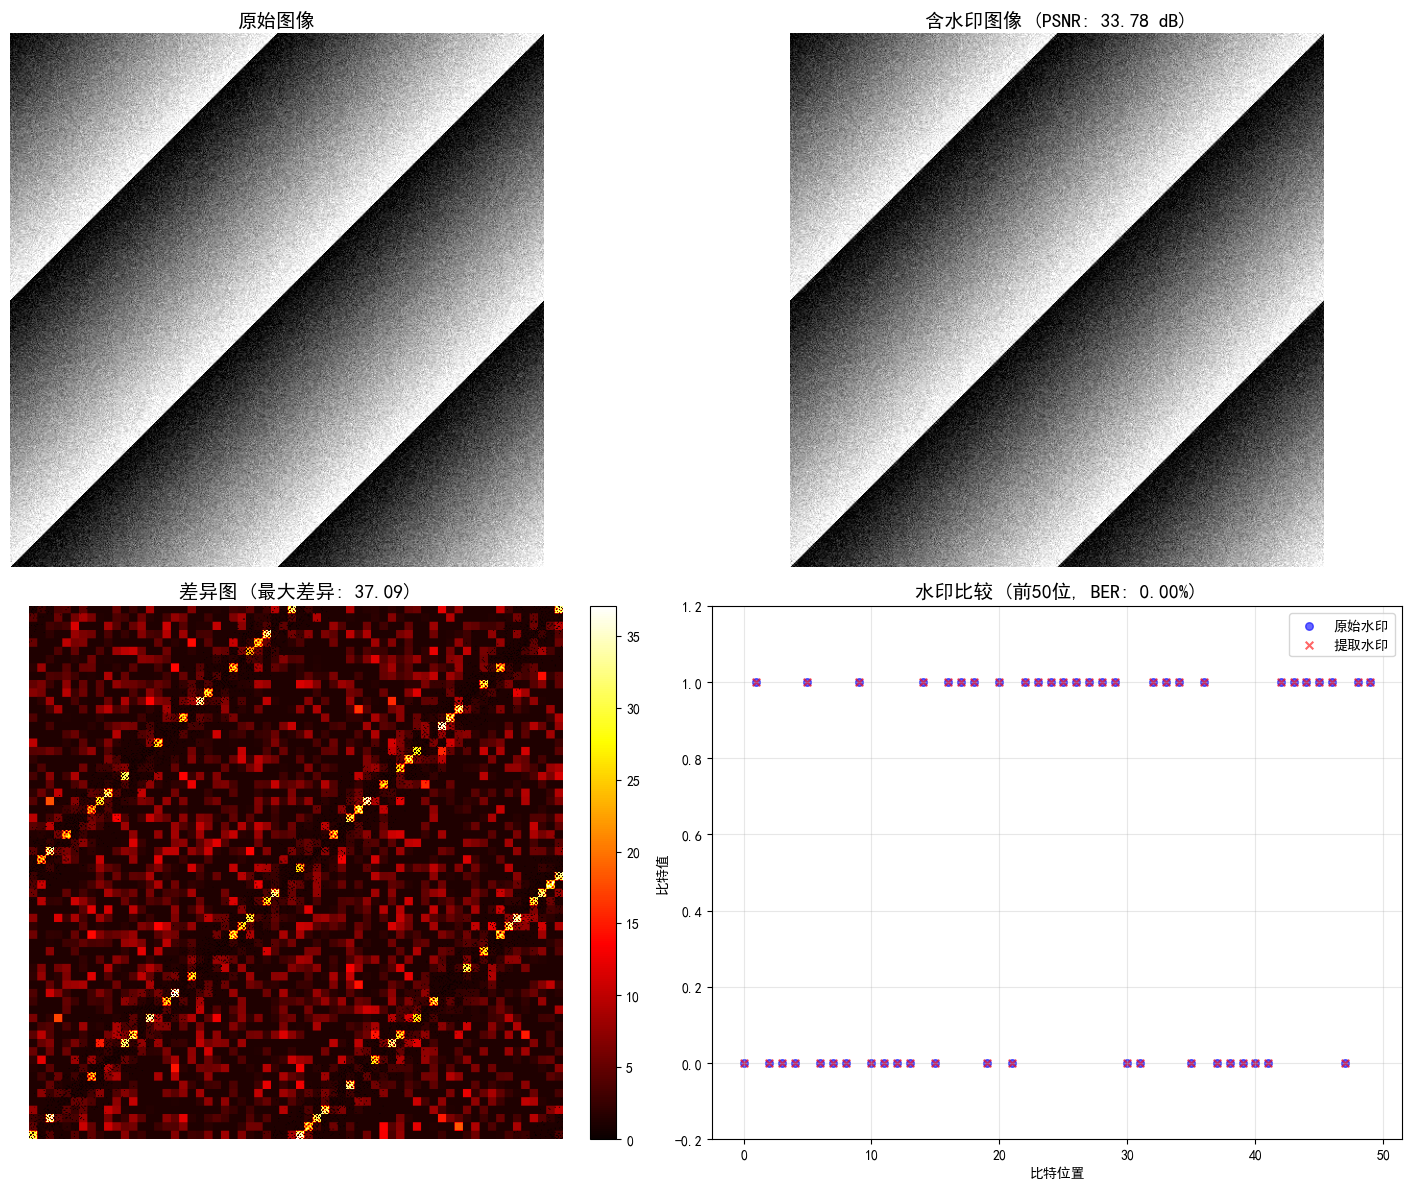

In [47]:
print("\n[步骤8] 结果可视化")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 原始图像
axes[0, 0].imshow(original_image, cmap='gray')
axes[0, 0].set_title('原始图像', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# 含水印图像
axes[0, 1].imshow(watermarked_image, cmap='gray')
axes[0, 1].set_title(f'含水印图像 (PSNR: {psnr:.2f} dB)', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

# 差异图
diff_image = np.abs(original_image - watermarked_image)
im_diff = axes[1, 0].imshow(diff_image, cmap='hot')
axes[1, 0].set_title(f'差异图 (最大差异: {diff_image.max():.2f})', fontsize=14, fontweight='bold')
axes[1, 0].axis('off')
plt.colorbar(im_diff, ax=axes[1, 0], fraction=0.046, pad=0.04)

# 水印比较
x_pos = np.arange(min(50, len(watermark)))
axes[1, 1].scatter(x_pos, watermark[:50], alpha=0.6, s=30, c='blue', label='原始水印')
axes[1, 1].scatter(x_pos, extracted_watermark[:50], alpha=0.6, s=30, c='red', marker='x', label='提取水印')
axes[1, 1].set_xlabel('比特位置')
axes[1, 1].set_ylabel('比特值')
axes[1, 1].set_title(f'水印比较 (前50位, BER: {ber:.2f}%)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim([-0.2, 1.2])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
print("\n[步骤9] 鲁棒性测试\n")
print("测试水印在各种攻击下的鲁棒性...")

temp_file = 'temp_watermarked.jpg'
attacks = {}

print("攻击1: JPEG压缩 (quality=75)")
try:
    cv2.imwrite(temp_file, watermarked_image.astype(np.uint8))
    compressed_img = cv2.imread(temp_file, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    extracted_1 = wm.extract(compressed_img, wm_length=len(watermark))
    ber_1 = calculate_ber(watermark, extracted_1)
    attacks['JPEG压缩'] = ber_1
    print(f"   BER: {ber_1:.2f}%")
    if os.path.exists(temp_file):
        os.remove(temp_file)
except Exception as e:
    print(f"   JPEG压缩测试失败: {e}")
    attacks['JPEG压缩'] = float('inf')

print("\n攻击2: 高斯滤波 (kernel=3×3)")
try:
    filtered_img = cv2.GaussianBlur(watermarked_image, (3, 3), 0)
    extracted_2 = wm.extract(filtered_img, wm_length=len(watermark))
    ber_2 = calculate_ber(watermark, extracted_2)
    attacks['高斯滤波'] = ber_2
    print(f"   BER: {ber_2:.2f}%")
except Exception as e:
    print(f"   高斯滤波测试失败: {e}")
    attacks['高斯滤波'] = float('inf')

print("\n攻击3: 加性高斯噪声 (σ=5)")
try:
    np.random.seed(123)
    noisy_img = watermarked_image + np.random.normal(0, 5, watermarked_image.shape)
    noisy_img = np.clip(noisy_img, 0, 255)
    extracted_3 = wm.extract(noisy_img, wm_length=len(watermark))
    ber_3 = calculate_ber(watermark, extracted_3)
    attacks['加性噪声'] = ber_3
    print(f"   BER: {ber_3:.2f}%")
except Exception as e:
    print(f"   噪声测试失败: {e}")
    attacks['加性噪声'] = float('inf')

print("\n攻击4: 对比度调整 (×0.9 + 25)")
try:
    contrast_img = watermarked_image * 0.9 + 25
    contrast_img = np.clip(contrast_img, 0, 255)
    extracted_4 = wm.extract(contrast_img, wm_length=len(watermark))
    ber_4 = calculate_ber(watermark, extracted_4)
    attacks['对比度调整'] = ber_4
    print(f"   BER: {ber_4:.2f}%")
except Exception as e:
    print(f"   对比度调整测试失败: {e}")
    attacks['对比度调整'] = float('inf')

print("\n攻击5: 缩放操作 (0.8倍后恢复)")
try:
    h_orig, w_orig = watermarked_image.shape
    scaled_down = cv2.resize(watermarked_image, (int(w_orig*0.8), int(h_orig*0.8)))
    scaled_back = cv2.resize(scaled_down, (w_orig, h_orig))
    extracted_5 = wm.extract(scaled_back, wm_length=len(watermark))
    ber_5 = calculate_ber(watermark, extracted_5)
    attacks['缩放操作'] = ber_5
    print(f"   BER: {ber_5:.2f}%")
except Exception as e:
    print(f"   缩放操作测试失败: {e}")
    attacks['缩放操作'] = float('inf')

valid_bers = [ber for ber in attacks.values() if not np.isinf(ber)]
avg_ber = np.mean(valid_bers) if valid_bers else float('inf')

print(f"\n{'='*70}")
print(f"{'鲁棒性测试结果':^70}")
print(f"{'='*70}")
print(f"无攻击: BER = {ber:.2f}%")
for attack_name, attack_ber in attacks.items():
    if not np.isinf(attack_ber):
        print(f"{attack_name}: BER = {attack_ber:.2f}%")
    else:
        print(f"{attack_name}: 测试失败")

if not np.isinf(avg_ber):
    print(f"平均攻击后BER: {avg_ber:.2f}%")
    if avg_ber < 10:
        robustness_assessment = "鲁棒性强"
    elif avg_ber < 20:
        robustness_assessment = "鲁棒性中等"
    else:
        robustness_assessment = "鲁棒性较弱"
    print(f"鲁棒性评估: {robustness_assessment}")
else:
    print("无法计算平均BER")

print(f"{'='*70}\n")


[步骤9] 鲁棒性测试

测试水印在各种攻击下的鲁棒性...
攻击1: JPEG压缩 (quality=75)

[步骤7] 水印提取...
   目标水印长度: 4096 比特
   嵌入位置数: 1
   实际提取比特数: 4096
   DCT系数统计:
     均值: 1.27
     标准差: 31.59
     正值比例: 50.1%
   提取耗时: 0.0449 秒
   BER: 0.00%

攻击2: 高斯滤波 (kernel=3×3)

[步骤7] 水印提取...
   目标水印长度: 4096 比特
   嵌入位置数: 1
   实际提取比特数: 4096
   DCT系数统计:
     均值: 0.31
     标准差: 6.57
     正值比例: 50.2%
   提取耗时: 0.0473 秒
   BER: 5.81%

攻击3: 加性高斯噪声 (σ=5)

[步骤7] 水印提取...
   目标水印长度: 4096 比特
   嵌入位置数: 1
   实际提取比特数: 4096
   DCT系数统计:
     均值: 1.31
     标准差: 31.35
     正值比例: 50.0%
   提取耗时: 0.0472 秒
   BER: 0.37%

攻击4: 对比度调整 (×0.9 + 25)

[步骤7] 水印提取...
   目标水印长度: 4096 比特
   嵌入位置数: 1
   实际提取比特数: 4096
   DCT系数统计:
     均值: 1.12
     标准差: 28.44
     正值比例: 50.1%
   提取耗时: 0.0442 秒
   BER: 0.00%

攻击5: 缩放操作 (0.8倍后恢复)

[步骤7] 水印提取...
   目标水印长度: 4096 比特
   嵌入位置数: 1
   实际提取比特数: 4096
   DCT系数统计:
     均值: 0.41
     标准差: 10.46
     正值比例: 50.3%
   提取耗时: 0.0469 秒
   BER: 10.77%

                               鲁棒性测试结果                                
无攻击: BER = 0.

鲁棒性测试可视化


C:\Users\16947\AppData\Local\Temp\ipykernel_10188\3882137507.py:66: UserWarning: Glyph 8226 (\N{BULLET}) missing from current font.
  plt.tight_layout()


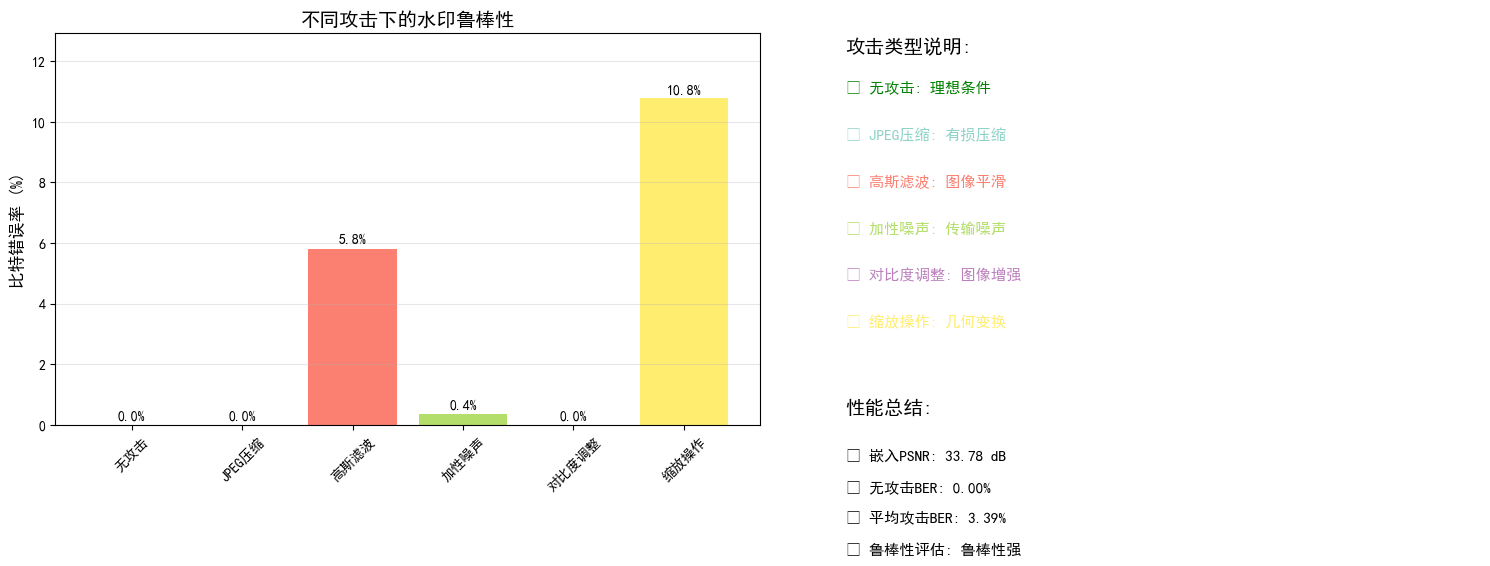

In [49]:
print("鲁棒性测试可视化")

# 准备可视化数据
valid_attacks = {k: v for k, v in attacks.items() if not np.isinf(v)}
attack_names = list(valid_attacks.keys())
attack_bers = list(valid_attacks.values())

# 如果有有效的攻击测试结果，则进行可视化
if valid_attacks:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # BER条形图
    colors = plt.cm.Set3(np.linspace(0, 1, len(attack_names)))
    bars = ax1.bar(['无攻击'] + attack_names, [ber] + attack_bers, color=['green'] + list(colors))
    
    ax1.set_ylabel('比特错误率 (%)', fontsize=12, fontweight='bold')
    ax1.set_title('不同攻击下的水印鲁棒性', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 在条形上添加数值标签
    for bar, val in zip(bars, [ber] + attack_bers):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # 设置y轴范围
    max_ber = max([ber] + attack_bers)
    ax1.set_ylim([0, max_ber * 1.2])
    
    # 旋转x轴标签
    ax1.tick_params(axis='x', rotation=45)
    
    # 攻击类型说明
    attack_descriptions = [
        "无攻击: 理想条件",
        "JPEG压缩: 有损压缩",
        "高斯滤波: 图像平滑",
        "加性噪声: 传输噪声",
        "对比度调整: 图像增强",
        "缩放操作: 几何变换"
    ]
    
    ax2.axis('off')
    ax2.text(0.1, 0.95, '攻击类型说明:', fontsize=14, fontweight='bold', transform=ax2.transAxes)
    
    y_pos = 0.85
    for i, desc in enumerate(attack_descriptions):
        if i == 0 or (i > 0 and attack_names[i-1] in valid_attacks):
            color = 'green' if i == 0 else colors[i-1]
            ax2.text(0.1, y_pos, f"• {desc}", fontsize=11, 
                    transform=ax2.transAxes, color=color, fontweight='bold')
            y_pos -= 0.12
    
    # 性能总结
    ax2.text(0.1, y_pos - 0.1, '性能总结:', fontsize=14, fontweight='bold', transform=ax2.transAxes)
    y_pos -= 0.22
    
    ax2.text(0.1, y_pos, f'• 嵌入PSNR: {psnr:.2f} dB', fontsize=11, transform=ax2.transAxes)
    y_pos -= 0.08
    ax2.text(0.1, y_pos, f'• 无攻击BER: {ber:.2f}%', fontsize=11, transform=ax2.transAxes)
    y_pos -= 0.08
    if not np.isinf(avg_ber):
        ax2.text(0.1, y_pos, f'• 平均攻击BER: {avg_ber:.2f}%', fontsize=11, transform=ax2.transAxes)
        y_pos -= 0.08
        ax2.text(0.1, y_pos, f'• 鲁棒性评估: {robustness_assessment}', fontsize=11, transform=ax2.transAxes)
    
    plt.tight_layout()
    plt.show()
else:
    print("所有攻击测试都失败了，无法生成可视化图表")